# 1. Download and Load GEO Transcriptomics Data

In this step, we download gene expression data from the GEO database (GSE63060), which provides normalized transcriptomic profiles from human blood samples. The dataset is compressed in `.txt.gz` format. After downloading, we extract the file and load it into a pandas DataFrame for analysis.

We also transpose the matrix so that each row represents a sample (individual), and each column corresponds to a gene.

In [20]:
# Step 1: Import necessary libraries
import pandas as pd
import gzip
import shutil
import os
import urllib.request

# Step 2: Define the download URL and file paths
url = 'https://ftp.ncbi.nlm.nih.gov/geo/series/GSE63nnn/GSE63060/suppl/GSE63060_normalized.txt.gz'
compressed_file = 'GSE63060_normalized.txt.gz'
extracted_file = 'GSE63060_normalized.txt'

# Step 3: Download the compressed file
print("Downloading the dataset...")
urllib.request.urlretrieve(url, compressed_file)
print("Download complete.")

# Step 4: Extract the .gz file
print("Extracting the file...")
with gzip.open(compressed_file, 'rb') as f_in:
    with open(extracted_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)
print("Extraction complete.")

# Step 5: Load the file into a pandas DataFrame
print("Loading data into DataFrame...")
df = pd.read_csv(extracted_file, sep='\t', index_col=0)
print("Data shape:", df.shape)
display(df.head())

# Step 6: Transpose the matrix so that rows = samples, columns = genes
df_T = df.T
df_T.reset_index(inplace=True)
df_T.rename(columns={'index': 'SampleID'}, inplace=True)
print("Transposed shape:", df_T.shape)
display(df_T.head())

Download complete.
Extracting the file...
Extraction complete.
Loading data into DataFrame...
Data shape: (38324, 330)


,4856076042_C,4856076042_L,4856050003_A,4856050003_F,4856050003_K,4856050007_C,4856050007_H,4856050007_L,4856050008_A,4856050008_C,...,4856076030_C,4856076030_G,4856076030_K,4856076038_A,4856076038_H,4856076038_I,4856076038_J,4856076038_L,4856076040_E,4856076040_H
ID_REF,,,,,,,,,,,,,,,,,,,,,
ILMN_2055271,7.508217,7.932968,7.522543,7.502342,7.635498,7.503576,7.523734,7.592583,7.597427,7.457464,...,7.482541,7.668118,7.622264,7.664433,7.487218,7.527648,7.550958,7.665030,7.622884,7.613750
ILMN_2383229,7.539625,7.500132,7.561126,7.318105,7.408300,7.457555,7.379805,7.452386,7.503312,7.397086,...,7.478469,7.413051,7.412199,7.462098,7.414577,7.473767,7.479001,7.425904,7.461043,7.439537
ILMN_1806310,7.501998,7.561347,7.477724,7.416778,7.488659,7.402348,7.423113,7.585975,7.628886,7.505248,...,7.426932,7.470555,7.482996,7.457693,7.542132,7.504774,7.485507,7.470026,7.437757,7.577692
ILMN_1779670,7.497368,7.399178,7.478485,7.474564,7.486861,7.544641,7.493849,7.528276,7.515094,7.450847,...,7.434865,7.446895,7.542946,7.507843,7.512000,7.460640,7.509407,7.485005,7.513871,7.554385
ILMN_2321282,7.430073,7.502182,7.515345,7.536534,7.756676,7.580582,7.579536,7.632878,7.639937,7.528992,...,7.460100,7.427333,7.479818,7.526644,7.496638,7.470737,7.454827,7.449878,7.503317,7.649326


Transposed shape: (330, 38325)


ID_REF,SampleID,ILMN_2055271,ILMN_2383229,ILMN_1806310,ILMN_1779670,ILMN_2321282,ILMN_1671474,ILMN_1772582,ILMN_1653355,ILMN_1717783,...,ILMN_1685547,ILMN_2348512,ILMN_1743643,ILMN_1794932,ILMN_1656676,ILMN_2371169,ILMN_1701875,ILMN_1786396,ILMN_1653618,ILMN_2137536
0,4856076042_C,7.508217,7.539625,7.501998,7.497368,7.430073,7.512931,7.561974,7.738164,7.501256,...,7.473234,7.769604,8.107411,7.462705,10.946598,11.205103,12.153011,8.308791,8.199172,7.707338
1,4856076042_L,7.932968,7.500132,7.561347,7.399178,7.502182,7.492235,7.541043,7.921211,7.357218,...,7.573565,7.902502,8.382904,7.432822,11.445187,11.013629,12.040313,8.383954,8.056210,7.578754
2,4856050003_A,7.522543,7.561126,7.477724,7.478485,7.515345,7.482415,7.393405,7.558553,7.489823,...,7.482817,7.727601,8.306461,7.456079,10.531047,11.046253,11.374038,8.821029,8.187277,8.180340
3,4856050003_F,7.502342,7.318105,7.416778,7.474564,7.536534,7.504980,7.371078,7.589525,7.597518,...,7.514174,7.804023,8.078848,7.439493,10.406832,11.052675,11.540283,8.646717,7.712230,7.594293
4,4856050003_K,7.635498,7.408300,7.488659,7.486861,7.756676,7.428684,7.434437,7.603282,7.406909,...,7.503157,7.743029,8.224018,7.442270,10.600872,11.777748,12.101207,8.682909,7.736455,7.671553


# 2. Map ILMN Probe IDs to Gene Symbols

The expression data uses **Illumina probe IDs (ILMN_XXXXXXX)** instead of gene names. To make the data biologically interpretable, we map these probe IDs to human gene symbols using the official GPL6947 annotation file provided by GEO.

This step ensures that we analyze gene-level expression instead of technical probe identifiers.

In [21]:
import urllib.request
import gzip
from io import StringIO

# Step 1: Download the GPL6947 annotation file
anno_url = 'https://ftp.ncbi.nlm.nih.gov/geo/platforms/GPL6nnn/GPL6947/annot/GPL6947.annot.gz'
anno_file = 'GPL6947.annot.gz'

print("Downloading GPL6947 annotation file...")
urllib.request.urlretrieve(anno_url, anno_file)
print("Download complete.")

# Step 2: Read annotation lines and detect header
with gzip.open(anno_file, 'rt', encoding='utf-8', errors='ignore') as f:
    lines = f.readlines()

# Step 3: Find the header line
header_index = next((i for i, line in enumerate(lines) if line.startswith("ID\t")), None)
if header_index is None:
    raise ValueError("Could not find header row in annotation file")

# Step 4: Load annotation table from header line
content = "".join(lines[header_index:])
anno_df = pd.read_csv(StringIO(content), sep='\t')

# Step 5: Extract probe-to-gene mapping
print("Annotation columns:", anno_df.columns.tolist())

# Use 'Gene symbol' column and rename for clarity
anno_df = anno_df[['ID', 'Gene symbol']].dropna()
anno_df.columns = ['ID', 'Symbol']

# Step 6: Map ILMN probe IDs to gene symbols
probe_to_gene = dict(zip(anno_df['ID'], anno_df['Symbol']))

df_mapped = df.copy()
df_mapped.rename(index=probe_to_gene, inplace=True)

# Step 7: Clean up duplicate / missing gene symbols
df_mapped = df_mapped[~df_mapped.index.duplicated(keep='first')]
df_mapped = df_mapped[~df_mapped.index.isna()]

# Step 8: Transpose again for modeling
df_T = df_mapped.T.reset_index().rename(columns={'index': 'SampleID'})
print("Final mapped data shape:", df_T.shape)
display(df_T.head())

Download complete.
Annotation columns: ['ID', 'Gene title', 'Gene symbol', 'Gene ID', 'UniGene title', 'UniGene symbol', 'UniGene ID', 'Nucleotide Title', 'GI', 'GenBank Accession', 'Platform_CLONEID', 'Platform_ORF', 'Platform_SPOTID', 'Chromosome location', 'Chromosome annotation', 'GO:Function', 'GO:Process', 'GO:Component', 'GO:Function ID', 'GO:Process ID', 'GO:Component ID', 'Platform_SEQUENCE']
Final mapped data shape: (330, 30904)


ID_REF,SampleID,A1BG,A1CF,POTEA,POTEB3,ILMN_1653355,ILMN_1717783,ILMN_1705025,RBFOX1,A2M,...,ILMN_2374633,ZWINT,ILMN_1673117,ZXDB,ZXDC,ILMN_1794932,ZYG11B,ZYX,ZZEF1,ZZZ3
0,4856076042_C,7.508217,7.539625,7.430073,7.561974,7.738164,7.501256,7.529393,7.404882,7.464524,...,7.903360,7.491012,7.886026,7.473234,7.769604,7.462705,10.946598,11.205103,8.308791,8.199172
1,4856076042_L,7.932968,7.500132,7.502182,7.541043,7.921211,7.357218,7.544226,7.442319,7.609070,...,7.875324,7.608251,7.637947,7.573565,7.902502,7.432822,11.445187,11.013629,8.383954,8.056210
2,4856050003_A,7.522543,7.561126,7.515345,7.393405,7.558553,7.489823,7.388160,7.435526,7.414548,...,8.052394,7.418108,7.684773,7.482817,7.727601,7.456079,10.531047,11.046253,8.821029,8.187277
3,4856050003_F,7.502342,7.318105,7.536534,7.371078,7.589525,7.597518,7.386342,7.382282,7.436154,...,7.897520,7.503024,7.528169,7.514174,7.804023,7.439493,10.406832,11.052675,8.646717,7.712230
4,4856050003_K,7.635498,7.408300,7.756676,7.434437,7.603282,7.406909,7.424824,7.424018,7.524364,...,7.738682,7.613498,7.580909,7.503157,7.743029,7.442270,10.600872,11.777748,8.682909,7.736455


# 3. Load Single-Cell RNA-Seq Expression Data

We now load **single-cell RNA-Seq** data from a melanoma brain metastasis sample (`GSM5645890`) available from GEO. This dataset has log-normalized gene expression values per cell.

The goal is to explore gene expression **across different cell types**, enabling us to detect patterns relevant to inflammation, aging, or disease.

In [22]:
import pandas as pd
import urllib.request
import gzip

# URL of normalized expression data
url = "https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5645nnn/GSM5645890/suppl/GSM5645890_Melan_3_LogNormalized_Data.csv.gz"
file_name = "Melan_3_LogNormalized_Data.csv.gz"

# Download
urllib.request.urlretrieve(url, file_name)

# Read compressed CSV
with gzip.open(file_name, 'rt') as f:
    expr_df = pd.read_csv(f, index_col=0)

# Preview
print("Shape:", expr_df.shape)
expr_df.iloc[:5, :5]

Shape: (26328, 3274)


,GlME13bm_AACACGTAGTTCGCGC,GlME13bm_AACGTTGCACACCGAC,GlME13bm_AACTCAGAGTCCAGGA,GlME13bm_AACTCAGCAGCGAACA,GlME13bm_AACTGGTCATGACATC
RP11-34P13.7,0.000000,0.000000,0.000000,0.0,0.000000
FO538757.2,0.000000,0.000000,0.000000,0.0,0.000000
AP006222.2,0.751154,0.625746,0.496526,0.0,0.780321
RP4-669L17.10,0.000000,0.625746,0.000000,0.0,0.000000
RP5-857K21.4,0.000000,0.000000,0.000000,0.0,0.000000


# 4. Merge Cell Type Annotations

Each cell in the expression matrix belongs to a specific **cell type** (e.g., T cell, macrophage, endothelial). We load this annotation file and merge it with the expression matrix to allow for cell-type-specific analysis.

In [23]:
# Download cell type annotations
anno_url = "https://ftp.ncbi.nlm.nih.gov/geo/samples/GSM5645nnn/GSM5645890/suppl/GSM5645890_Melan_3_Cell_Types_Annotations.csv.gz"
anno_file = "Melan_3_Cell_Types_Annotations.csv.gz"
urllib.request.urlretrieve(anno_url, anno_file)

# Load annotation
with gzip.open(anno_file, 'rt') as f:
    celltype_df = pd.read_csv(f)

# Rename for merge
celltype_df.rename(columns={'Unnamed: 0': 'Cell_ID'}, inplace=True)

# Transpose expression matrix so rows = cells
expr_T = expr_df.T
expr_T.index.name = 'Cell_ID'
expr_T.reset_index(inplace=True)

# Merge
merged_df = pd.merge(expr_T, celltype_df, on='Cell_ID')
print("Merged shape:", merged_df.shape)
merged_df[['Cell_ID', 'Cell_Type']].head()

Merged shape: (3274, 26330)


,Cell_ID,Cell_Type
0,GlME13bm_AACACGTAGTTCGCGC,vSMCs
1,GlME13bm_AACGTTGCACACCGAC,vSMCs
2,GlME13bm_AACTCAGAGTCCAGGA,PC-3
3,GlME13bm_AACTCAGCAGCGAACA,PC-2
4,GlME13bm_AACTGGTCATGACATC,PC-1


# 5. Compute Average Gene Expression Per Cell Type

We now group the expression matrix by `Cell_Type` and calculate the **mean expression** of each gene per cell type. This produces a "digital phenotype" of each cell type for downstream clustering or gene-level exploration.

In [24]:
# Group by Cell Type
grouped_expr = merged_df.groupby('Cell_Type').mean(numeric_only=True)

# Preview
print("Grouped shape:", grouped_expr.shape)
grouped_expr.head()

Grouped shape: (21, 26328)


,RP11-34P13.7,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP11-206L10.9,FAM87B,LINC00115,FAM41C,SAMD11,...,RP11-397O8.7,LINC01054,CTD-2207P18.2,RP11-344A16.2,RP11-526I2.1,RP11-679B19.2,CD300LG,RP11-17E3.1,RP11-567M16.3,CTD-2553C6.1
Cell_Type,,,,,,,,,,,,,,,,,,,,,
Astrocytes,0.00000,0.088127,0.599973,0.000000,0.017477,0.036621,0.000000,0.000000,0.026616,0.038476,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-c1,0.00000,0.023603,0.034088,0.001470,0.000000,0.004275,0.000000,0.010038,0.018620,0.004279,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-c2,0.00000,0.043090,0.032043,0.000000,0.000000,0.010578,0.000000,0.010697,0.006198,0.013633,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC-1,0.00643,0.099304,0.160831,0.004239,0.000000,0.004932,0.003161,0.003754,0.013756,0.009766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EC-2,0.00000,0.106941,0.117645,0.004683,0.000000,0.009453,0.000000,0.028632,0.009993,0.014338,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 6. Visualize Most Variable Genes Across Cell Types

We identify the top 20 genes with the **highest variance across cell types**. These genes show the most dynamic differences in expression, which may reveal cell-type-specific biological roles.

We plot their expression in a heatmap for a quick visual summary.

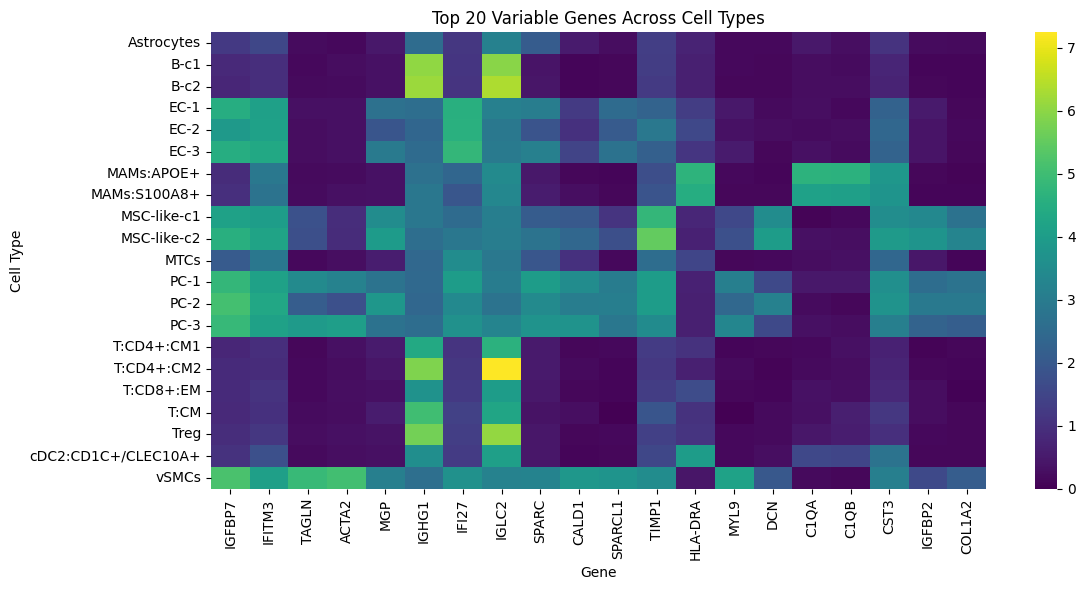

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Find top 20 variable genes
top_genes = grouped_expr.var().sort_values(ascending=False).head(20).index

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_expr[top_genes], cmap="viridis", annot=False)
plt.title("Top 20 Variable Genes Across Cell Types")
plt.ylabel("Cell Type")
plt.xlabel("Gene")
plt.tight_layout()
plt.show()

# 7. Cluster Cell Types Based on Gene Expression

To understand similarity between cell types, we use PCA for dimensionality reduction and **KMeans clustering**. Each cell type is treated as a "digital phenotype" based on average gene expression.

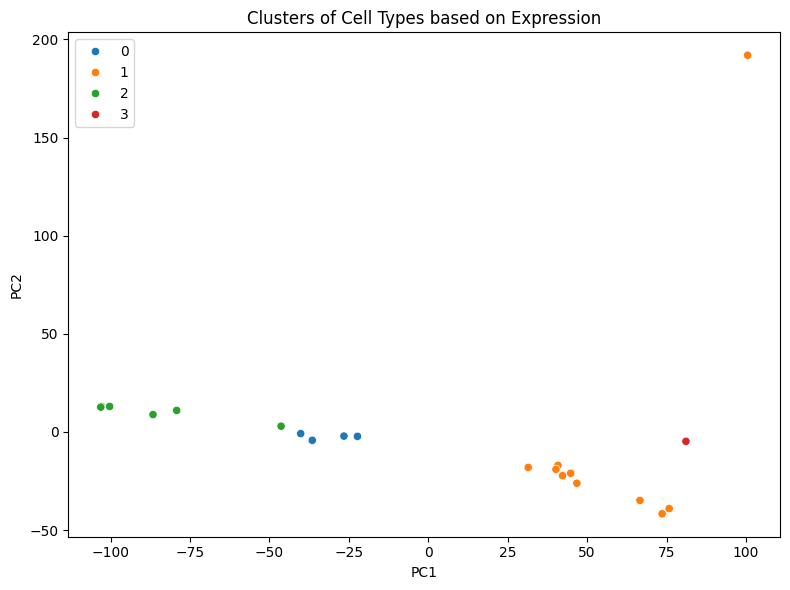

In [26]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize features
X = StandardScaler().fit_transform(grouped_expr)

# PCA
pca = PCA(n_components=2).fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=labels, palette="tab10")
plt.title("Clusters of Cell Types based on Expression")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# 8. User-Driven Gene Exploration

We provide a list of important genes (inflammatory, aging, Alzheimer’s-related). Users can choose genes to inspect their expression across cell types.

Select genes by number (comma-separated, e.g., 1,2,4):
1. IL1B
2. IL6
3. TNF
4. CXCL8
5. CDKN2A
6. FOXO3
7. SIRT1
8. APOE
9. APP
10. MAPT
11. TREM2
Enter gene numbers: 1,4,7,11

Selected genes (found in data): ['IL1B', 'CXCL8', 'SIRT1', 'TREM2']


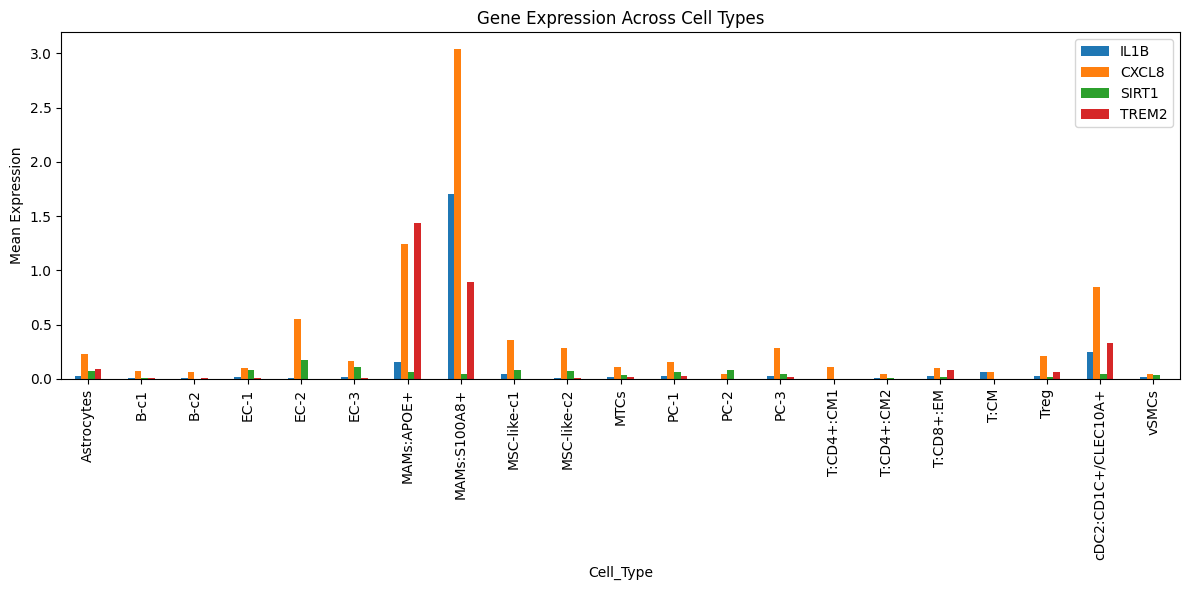

In [27]:
# Gene panel dictionary
gene_panel = {
    1: 'IL1B',
    2: 'IL6',
    3: 'TNF',
    4: 'CXCL8',
    5: 'CDKN2A',
    6: 'FOXO3',
    7: 'SIRT1',
    8: 'APOE',
    9: 'APP',
    10: 'MAPT',
    11: 'TREM2'
}

# Show menu
print("Select genes by number (comma-separated, e.g., 1,2,4):")
for k, v in gene_panel.items():
    print(f"{k}. {v}")

# Input
selected = input("Enter gene numbers: ")
selected_indices = [int(x.strip()) for x in selected.split(",")]
genes_of_interest = [gene_panel[i] for i in selected_indices if i in gene_panel]

# Filter valid genes
valid_genes = [g for g in genes_of_interest if g in grouped_expr.columns]
print("\nSelected genes (found in data):", valid_genes)

# Plot
if valid_genes:
    grouped_expr[valid_genes].plot(kind='bar', figsize=(12,6))
    plt.title("Gene Expression Across Cell Types")
    plt.ylabel("Mean Expression")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
else:
    print("None of the selected genes were found in the dataset.")

# 9. Alzheimer’s-Associated Gene Expression

We focus on key genes known to be associated with Alzheimer’s Disease (e.g., `APP`, `MAPT`, `TREM2`, `APOE`, `CD33`). We plot their expression across different cell types to explore possible cell-type-specific contributions to neurodegeneration.

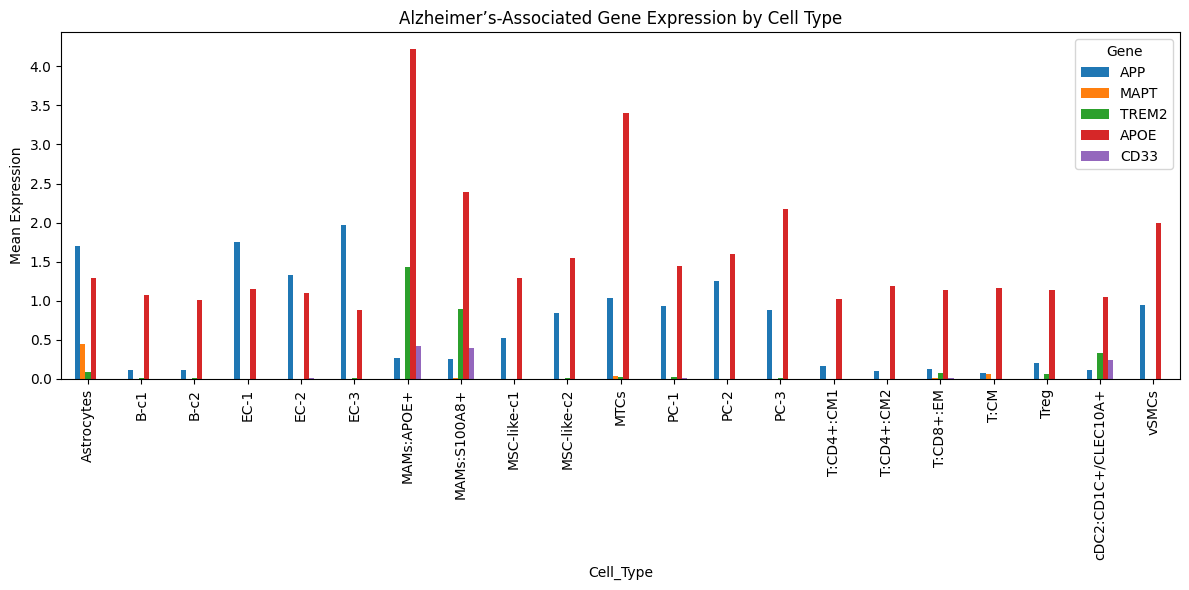

In [28]:
alz_genes = ['APP', 'MAPT', 'TREM2', 'APOE', 'CD33']
present = [gene for gene in alz_genes if gene in grouped_expr.columns]

grouped_expr[present].plot(kind='bar', figsize=(12, 6))
plt.title("Alzheimer’s-Associated Gene Expression by Cell Type")
plt.ylabel("Mean Expression")
plt.xticks(rotation=90)
plt.legend(title='Gene')
plt.tight_layout()
plt.show()

# 10. Inflammatory Gene Score Per Cell Type

To measure inflammation, we calculate an **Inflammation Score** for each cell type by summing the average expression of pro-inflammatory genes (`IL1B`, `IL6`, `TNF`, `CXCL8`). This can highlight which immune or glial cells may be more active in inflammation.

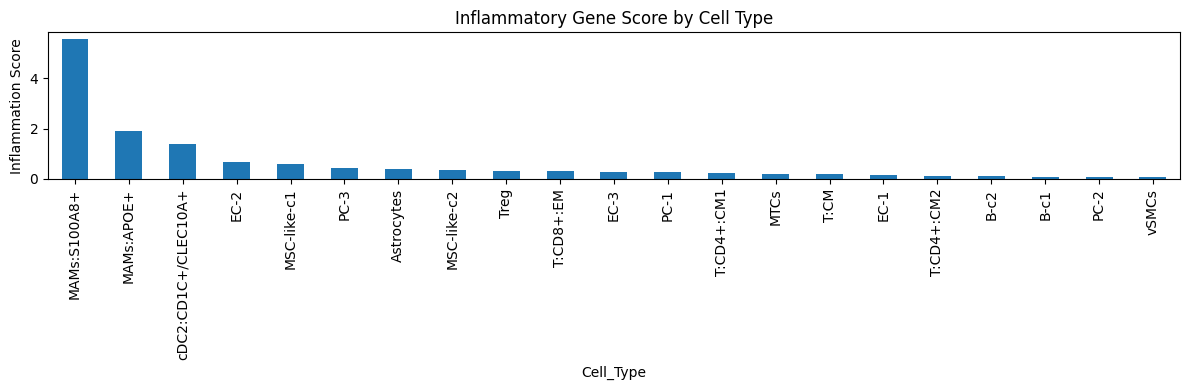

In [30]:
inflam_genes = ['IL1B', 'TNF', 'IL6', 'CXCL8']
inflam_genes = [g for g in inflam_genes if g in grouped_expr.columns]

grouped_expr['Inflammation_Score'] = grouped_expr[inflam_genes].sum(axis=1)

grouped_expr['Inflammation_Score'].sort_values(ascending=False).plot(kind='bar', figsize=(12,4))
plt.title("Inflammatory Gene Score by Cell Type")
plt.ylabel("Inflammation Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()